In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import warnings
warnings.filterwarnings("ignore")

from gridsearch import GridSearch1A

In [2]:
# Get the data
column_names = ["x1", "x2", "y"]
df = pd.read_csv("../datasets/1A/train.csv", names=column_names)
df_test = pd.read_csv("../datasets/1A/dev.csv", names=column_names)
display(df.head())

# Split dev into test and validation
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=42)
display(df_val.head())
display(df_test.head())

,x1,x2,y
0,-7.811425,1.910665,1.0
1,-0.856640,-9.639107,3.0
2,2.885077,4.785598,0.0
3,-1.405758,-7.364262,3.0
4,0.044472,-8.998423,3.0


,x1,x2,y
30,-8.107918,4.250882,1.0
53,3.864959,4.817073,0.0
118,4.211548,4.436624,0.0
9,3.234165,4.870823,0.0
33,7.908264,-11.186126,2.0


,x1,x2,y
44,-9.647875,1.662953,1.0
47,7.821765,-7.188280,2.0
4,-7.206942,0.939950,1.0
55,-8.203673,2.077040,1.0
26,-0.753439,-10.491104,3.0


In [3]:
X_train = df.drop("y", axis=1).to_numpy()
y_train = df["y"].to_numpy().astype("int")

X_val = df_val.drop("y", axis=1).to_numpy()
y_val = df_val["y"].to_numpy().astype("int")

X_test = df_test.drop("y", axis=1).to_numpy()
y_test = df_test["y"].to_numpy().astype("int")

In [4]:
parameters = {"hidden_layer_sizes":[5,8,10,15], "activation":["logistic", "tanh", "relu"], \
              "solver":["lbfgs", "sgd", "adam"], "batch_size":[100, 200], \
              "alpha":[0, 0.0001], "learning_rate":["constant", "adaptive", "invscaling"], \
             }

mlp = MLPClassifier(random_state=1)

clf = GridSearch1A(mlp, parameters)
clf.fit(X_train, y_train, X_val, y_val)
result_df = pd.DataFrame(clf.cv_results_)
result_df.to_csv("../parameter_search/1A_MLFFNN_train_val.csv")
result_df.head()

100%|██████████| 432/432 [02:00<00:00,  3.57it/s]


,hidden_layer_sizes,activation,solver,batch_size,alpha,learning_rate,accuracy,val_accuracy,sum_accuracy,t_inv
0,5,tanh,lbfgs,200,0.0001,adaptive,100.0,100.0,200.0,122.001920
1,5,tanh,lbfgs,200,0.0001,constant,100.0,100.0,200.0,121.863676
2,5,tanh,lbfgs,200,0.0000,invscaling,100.0,100.0,200.0,121.289263
3,5,tanh,lbfgs,200,0.0000,adaptive,100.0,100.0,200.0,120.852417
4,5,tanh,lbfgs,200,0.0000,constant,100.0,100.0,200.0,120.387600


In [5]:
print("Best Parameters Choosen:")
for i in clf.best_params_:
    print("   - ", i, ": ", clf.best_params_[i], sep="")

best_mlp = MLPClassifier(random_state=1, **clf.best_params_)
best_mlp.fit(X_train, y_train)

Best Parameters Choosen:
   - hidden_layer_sizes: 5
   - activation: tanh
   - solver: lbfgs
   - batch_size: 200
   - alpha: 0.0001
   - learning_rate: adaptive


MLPClassifier(activation='tanh', batch_size=200, hidden_layer_sizes=5,
              learning_rate='adaptive', random_state=1, solver='lbfgs')

Accuracy: 100.0


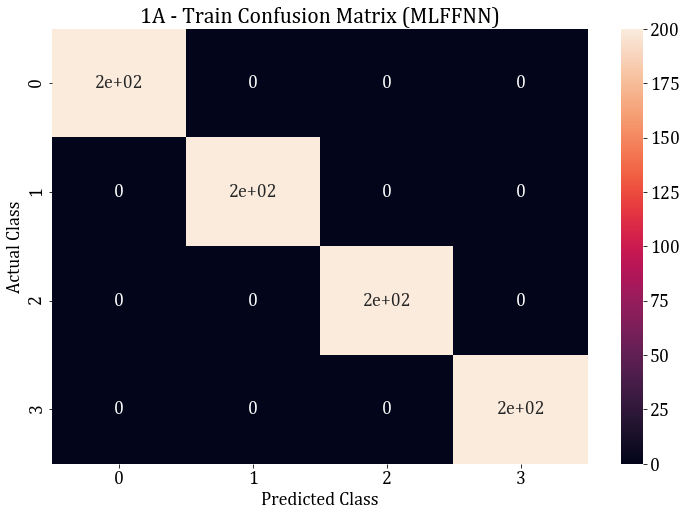

Validation Accuracy: 100.0


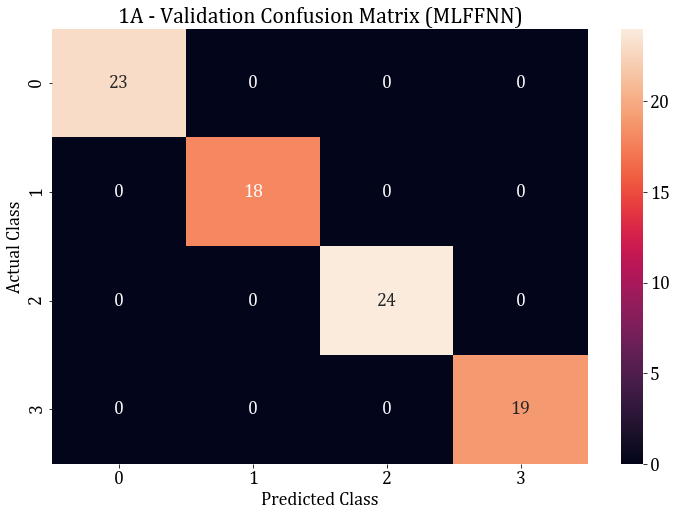

Validation Accuracy: 100.0


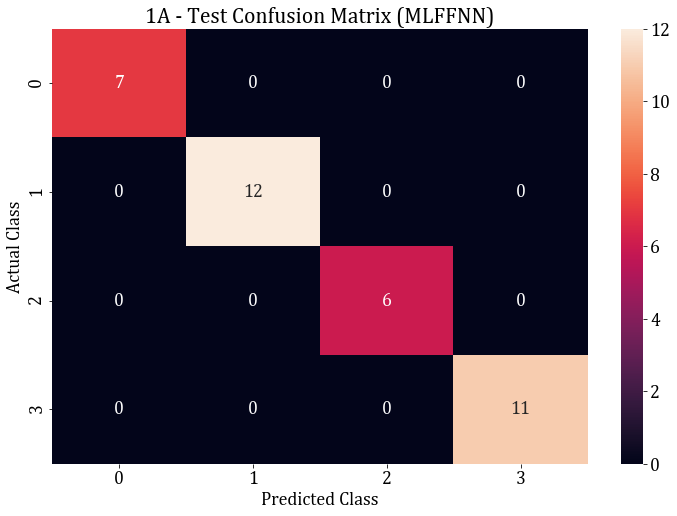

In [6]:
y_pred = best_mlp.predict(X_train)
print("Accuracy:", 100*np.sum(y_pred==y_train)/y_train.size)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("1A - Train Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1A_MLFFNN_train_confmat.png")
plt.show()

y_val_pred = best_mlp.predict(X_val)
print("Validation Accuracy:", 100*np.sum(y_val_pred==y_val)/y_val.size)
val_conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure()
sns.heatmap(val_conf_mat, annot=True)
plt.title("1A - Validation Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1A_MLFFNN_val_confmat.png")
plt.show()

y_test_pred = best_mlp.predict(X_test)
print("Validation Accuracy:", 100*np.sum(y_test_pred==y_test)/y_test.size)
test_conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(test_conf_mat, annot=True)
plt.title("1A - Test Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1A_MLFFNN_test_confmat.png")
plt.show()

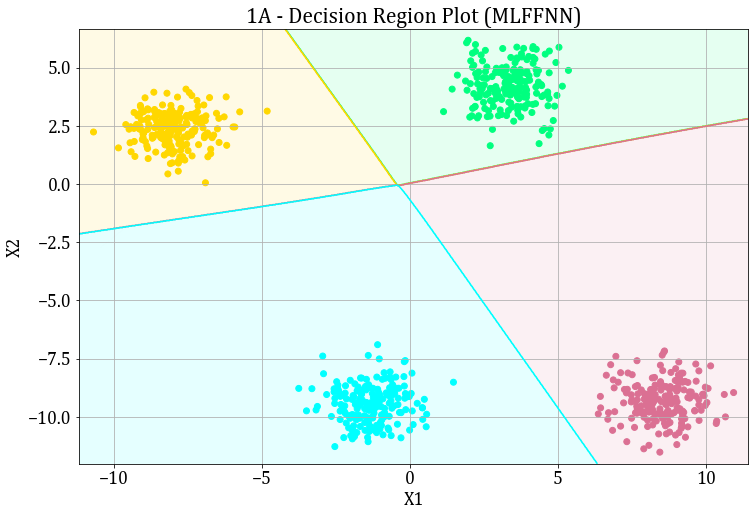

In [7]:
h = 0.02
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pro = np.argmax(best_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z_pro = Z_pro.reshape(xx.shape)

color_list = ["springgreen", "gold", "palevioletred", "cyan"]
plt.title("1A - Decision Region Plot (MLFFNN)")
plt.contourf(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=0.1)
plt.contour(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=1)
plt.scatter(X_train[:,0], X_train[:,1], c=[color_list[i] for i in y_train])
plt.xlabel("X1")
plt.ylabel("X2")
plt.savefig("images/1A_MLFFNN_Decision_Plot.png")
plt.show()